## Observations and Insights 

In [25]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice.

merge_df['Mouse ID'].value_counts(dropna=False)


g989    13
k894    10
e213    10
j365    10
m601    10
        ..
x226     1
v199     1
n482     1
x336     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#merge_df.duplicated(keep=False)

#duplicate_rows = merge_df[merge_df.duplicated(["Mouse ID"]["Timepoint"], keep=False)]
#duplicate_rows

merge_df.loc[merge_df.duplicated(subset=['Mouse ID','Timepoint']), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 



In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] !='g989']
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts(dropna=False)

k894    10
a520    10
k483    10
l725    10
s337    10
        ..
d133     1
u153     1
v199     1
t573     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_group_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_group_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_group_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_group_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_group_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_summary = {
    "Tumor Mean": tumor_group_mean,
    "Tumor Median": tumor_group_median,
    "Tumor Standard Deviation": tumor_group_std,
    "Tumor Variance": tumor_group_variance,
    "Tumor SEM": tumor_group_sem
}

tumor_summary_df = pd.DataFrame(tumor_summary)
tumor_summary_df


,Tumor Mean,Tumor Median,Tumor Standard Deviation,Tumor Variance,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

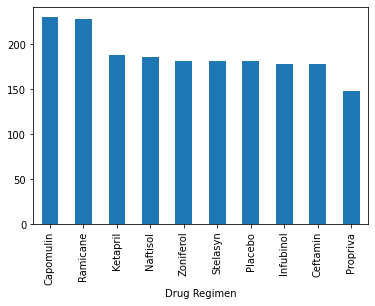

In [38]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_group = clean_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)

mouse_group.plot.bar("Drug Regimen", "Mouse ID")

<AxesSubplot:xlabel='Drug Regimen'>

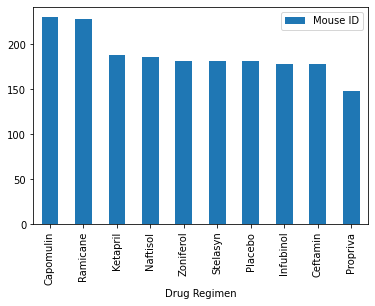

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mouse_group_df = pd.DataFrame(mouse_group)
mouse_group_df.plot(kind='bar')


In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_df["Sex"].value_counts()
mouse_gender

#df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
 #                  index=['Mercury', 'Venus', 'Earth'])
#>>> plot = df.plot.pie(y='mass', figsize=(5, 5))

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

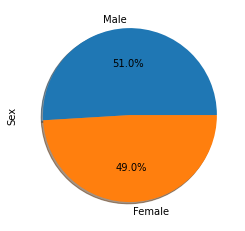

In [45]:

mouse_gender.plot(kind='pie', shadow = True, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x11cae9a60>,
 [Text(-0.6814042419013431, -0.8635324308437154, 'Male'),
  Text(0.7433500820741924, 0.942035379102235, 'Female')],
 [Text(-0.3716750410370962, -0.47101768955111745, '51.0%'),
  Text(0.4336208812099456, 0.549520637809637, '49.0%')])

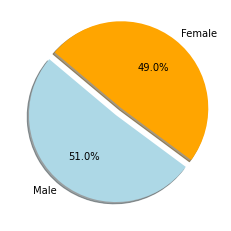

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
#sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["lightblue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1)
plt.pie(mouse_gender.values, explode=explode, labels=mouse_gender.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_df = clean_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Timepoint"]]
drug_df.head()
# Start by getting the last (greatest) timepoint for each mouse
mouse_time_group = drug_df.groupby("Mouse ID")["Timepoint"].max()
mouse_time_df = mouse_time_group.to_frame().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(drug_df, mouse_time_df, on=("Timepoint", "Mouse ID"), how="right")
merged_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
2,a262,Placebo,70.717621,45
3,a275,Ceftamin,62.999356,45
4,a366,Stelasyn,63.440686,30
...,...,...,...,...
243,z435,Propriva,48.710661,10
244,z578,Ramicane,30.638696,45
245,z581,Infubinol,62.754451,45
246,z795,Naftisol,65.741070,45


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
    
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

for drug in drugs:

    drug_vol = merged_df.loc[merged_df["Drug Regimen"]== drug]["Tumor Volume (mm3)"]
    tumor_vol.append(drug_vol)
    print(drug)
    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The interquartile range of volume is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
The interquartile range of volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane
The interquartile range of volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol
The interquartile range of volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ceftamin
The interquartile range of volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Text(0, 0.5, 'Final Tumor Volume (mm3)')

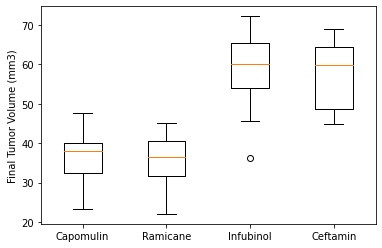

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels=drugs)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
